In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
crop = pd.read_csv("/content/drive/MyDrive/cpdata.csv")

In [ ]:
fert = pd.read_csv("/content/drive/MyDrive/Fertilizer.csv")

In [ ]:
crop.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,Rice,80,40,40,5.5
1,1,Jowar(Sorghum),80,40,40,5.5
2,2,Barley(JAV),70,40,45,5.5
3,3,Maize,80,40,20,5.5
4,4,Ragi( naachnnii),50,40,20,5.5


In [ ]:
# Function for lowering the cases
def change_case(i):
    i = i.replace(" ", "")
    i = i.lower()
    return i

In [ ]:
fert['Crop'] = fert['Crop'].apply(change_case)
crop['label'] = crop['label'].apply(change_case)

In [ ]:
#make some changes in ferttilizer dataset

fert['Crop'] = fert['Crop'].replace('mungbeans','mungbean')
fert['Crop'] = fert['Crop'].replace('lentils(masoordal)','lentil')
fert['Crop'] = fert['Crop'].replace('pigeonpeas(toordal)','pigeonpeas')
fert['Crop'] = fert['Crop'].replace('mothbean(matki)','mothbeans')
fert['Crop'] = fert['Crop'].replace('chickpeas(channa)','chickpea')

In [ ]:
crop_names = crop['label'].unique()
crop_names

array(['rice', 'wheat', 'mungbean', 'tea', 'millet', 'maize', 'lentil',
       'jute', 'coffee', 'cotton', 'groundnut', 'peas', 'rubber',
       'sugarcane', 'tobacco', 'kidneybeans', 'mothbeans', 'coconut',
       'blackgram', 'adzukibeans', 'pigeonpeas', 'chickpea', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon'], dtype=object)

In [ ]:
del fert['Unnamed: 0']

In [ ]:
fert.head()

,Crop,N,P,K,pH
0,rice,80,40,40,5.5
1,jowar(sorghum),80,40,40,5.5
2,barley(jav),70,40,45,5.5
3,maize,80,40,20,5.5
4,ragi(naachnnii),50,40,20,5.5


In [ ]:
crop_names_from_fert = fert['Crop'].unique()
crop_names_from_fert

array(['rice', 'jowar(sorghum)', 'barley(jav)', 'maize',
       'ragi(naachnnii)', 'chickpea', 'frenchbeans(farasbi)',
       'favabeans(papdi-val)', 'limabeans(pavta)', 'clusterbeans(gavar)',
       'soyabean', 'blackeyedbeans(chawli)', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'greenpeas', 'horsegram(kulthi)',
       'blackgram', 'rapeseed(mohri)', 'corianderseeds', 'mustardseeds',
       'sesameseed', 'cuminseeds', 'lentil', 'brinjal', 'beetroot',
       'bittergourd', 'bottlegourd', 'capsicum', 'cabbage', 'carrot',
       'cauliflower', 'cucumber', 'corianderleaves', 'curryleaves',
       'drumstick–moringa', 'chili', 'ladyfinger', 'mushroom', 'onion',
       'potato', 'pumpkin', 'radish', 'olive', 'sweetpotato',
       'fenugreekleaf(methi)', 'spinach', 'ridgegourd',
       'gooseberry(amla)', 'jambun(syzygiumcumini)',
       'ziziphusmauritiana(bor)', 'garciniaindica(kokam)', 'tamarind',
       'tapioca(suran)', 'garlic', 'lemon', 'tomato', 'ashgourd',
       '

In [ ]:
for i in crop_names_from_fert:
    print(crop[crop['label'] == i])

    temperature   humidity        ph    rainfall label
0     20.879744  82.002744  6.502985  202.935536  rice
1     21.770462  80.319644  7.038096  226.655537  rice
2     23.004459  82.320763  7.840207  263.964248  rice
3     26.491096  80.158363  6.980401  242.864034  rice
4     20.130175  81.604873  7.628473  262.717340  rice
..          ...        ...       ...         ...   ...
95    22.683191  83.463583  6.604993  194.265172  rice
96    21.533463  82.140041  6.500343  295.924880  rice
97    21.408658  83.329319  5.935745  287.576693  rice
98    26.543481  84.673536  7.072656  183.622266  rice
99    23.359054  83.595123  5.333323  188.413665  rice

[100 rows x 5 columns]
Empty DataFrame
Columns: [temperature, humidity, ph, rainfall, label]
Index: []
Empty DataFrame
Columns: [temperature, humidity, ph, rainfall, label]
Index: []
     temperature   humidity        ph    rainfall  label
500    22.613600  63.690706  5.749914   87.759539  maize
501    26.100184  71.574769  6.931757  102

In [ ]:
crop['label']

0             rice
1             rice
2             rice
3             rice
4             rice
           ...    
3095    watermelon
3096    watermelon
3097    watermelon
3098    watermelon
3099    watermelon
Name: label, Length: 3100, dtype: object

In [ ]:
extract_labels = []
for i in crop_names_from_fert:
    if i in crop_names:
        extract_labels.append(i)

In [ ]:
# using extract labesl on crop to get all the data related to those labels
new_crop = pd.DataFrame(columns = crop.columns)
new_fert = pd.DataFrame(columns = fert.columns)

In [ ]:
for label in extract_labels:
    new_crop = new_crop.append(crop[crop['label'] == label])

<ipython-input-18-c1880be03ffd>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_crop = new_crop.append(crop[crop['label'] == label])
<ipython-input-18-c1880be03ffd>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_crop = new_crop.append(crop[crop['label'] == label])
<ipython-input-18-c1880be03ffd>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_crop = new_crop.append(crop[crop['label'] == label])
<ipython-input-18-c1880be03ffd>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_crop = new_crop.append(crop[crop['label'] == label])
<ipython-input-18-c1880be03ffd>:2: FutureWarning: The frame.append method is deprecated and 

In [ ]:
for label in extract_labels:
    new_fert = new_fert.append(fert[fert['Crop'] == label].iloc[0])

<ipython-input-19-7079574dbe5c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_fert = new_fert.append(fert[fert['Crop'] == label].iloc[0])
<ipython-input-19-7079574dbe5c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_fert = new_fert.append(fert[fert['Crop'] == label].iloc[0])
<ipython-input-19-7079574dbe5c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_fert = new_fert.append(fert[fert['Crop'] == label].iloc[0])
<ipython-input-19-7079574dbe5c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_fert = new_fert.append(fert[fert['Crop'] == label].iloc[0])
<ipython-input-19-7079574dbe5c>:2: FutureWarning: The frame.appe

In [ ]:
crop

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
3095,25.287846,89.636679,6.765095,58.286977,watermelon
3096,26.638386,84.695469,6.189214,48.324286,watermelon
3097,25.331045,84.305338,6.904242,41.532187,watermelon
3098,26.897502,83.892415,6.463271,43.971937,watermelon


In [ ]:
crop.shape

(3100, 5)

In [ ]:
new_crop

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
895,26.774637,66.413269,6.780064,177.774507,coffee
896,27.417112,56.636362,6.086922,127.924610,coffee
897,24.131797,67.225123,6.362608,173.322839,coffee
898,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
new_crop = new_crop.reset_index(drop=True)

In [ ]:
new_crop

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee
2196,27.417112,56.636362,6.086922,127.924610,coffee
2197,24.131797,67.225123,6.362608,173.322839,coffee
2198,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
new_crop.shape

(2200, 5)

In [ ]:
fert

,Crop,N,P,K,pH
0,rice,80,40,40,5.50
1,jowar(sorghum),80,40,40,5.50
2,barley(jav),70,40,45,5.50
3,maize,80,40,20,5.50
4,ragi(naachnnii),50,40,20,5.50
...,...,...,...,...,...
1838,lemongrass,25,40,40,5.32
1839,cotton,120,40,20,5.32
1840,jute,80,40,40,5.32
1841,coffee,100,20,30,5.32


In [ ]:
new_fert

,Crop,N,P,K,pH
0,rice,80,40,40,5.5
3,maize,80,40,20,5.5
5,chickpea,40,60,80,5.5
12,kidneybeans,20,60,20,5.5
13,pigeonpeas,20,60,20,5.5
14,mothbeans,20,40,20,5.5
15,mungbean,20,40,20,5.5
18,blackgram,40,60,20,5.0
24,lentil,20,60,20,5.5
60,pomegranate,20,10,40,5.5


In [ ]:
import random
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(0,new_crop.shape[0]):
    crop = new_crop.label.iloc[i]
    #print(crop)
    N = new_fert[new_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20,20)
    P = new_fert[new_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5,20)
    K = new_fert[new_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    #print(d)
    temp = temp.append(d,ignore_index = True)

<ipython-input-28-599c67e06395>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append(d,ignore_index = True)
<ipython-input-28-599c67e06395>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append(d,ignore_index = True)
<ipython-input-28-599c67e06395>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append(d,ignore_index = True)
<ipython-input-28-599c67e06395>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append(d,ignore_index = True)
<ipython-input-28-599c67e06395>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

In [ ]:
temp

,N,P,K
0,74,52,36
1,72,38,40
2,68,51,45
3,65,43,41
4,81,41,35
...,...,...,...
2195,93,16,25
2196,85,30,28
2197,92,30,26
2198,94,34,25


In [ ]:
new_crop['N'] = temp['N']
new_crop['P'] = temp['P']
new_crop['K'] = temp['K']

In [ ]:
new_crop

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,74,52,36
1,21.770462,80.319644,7.038096,226.655537,rice,72,38,40
2,23.004459,82.320763,7.840207,263.964248,rice,68,51,45
3,26.491096,80.158363,6.980401,242.864034,rice,65,43,41
4,20.130175,81.604873,7.628473,262.717340,rice,81,41,35
...,...,...,...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee,93,16,25
2196,27.417112,56.636362,6.086922,127.924610,coffee,85,30,28
2197,24.131797,67.225123,6.362608,173.322839,coffee,92,30,26
2198,26.272418,52.127394,6.758793,127.175293,coffee,94,34,25


In [ ]:
new_crop = new_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [ ]:
new_crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,74,52,36,20.879744,82.002744,6.502985,202.935536,rice
1,72,38,40,21.770462,80.319644,7.038096,226.655537,rice
2,68,51,45,23.004459,82.320763,7.840207,263.964248,rice
3,65,43,41,26.491096,80.158363,6.980401,242.864034,rice
4,81,41,35,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,93,16,25,26.774637,66.413269,6.780064,177.774507,coffee
2196,85,30,28,27.417112,56.636362,6.086922,127.924610,coffee
2197,92,30,26,24.131797,67.225123,6.362608,173.322839,coffee
2198,94,34,25,26.272418,52.127394,6.758793,127.175293,coffee


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (5) than needed (22) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (5) than needed (22) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (5) than needed (22) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (5) than needed (22) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (5

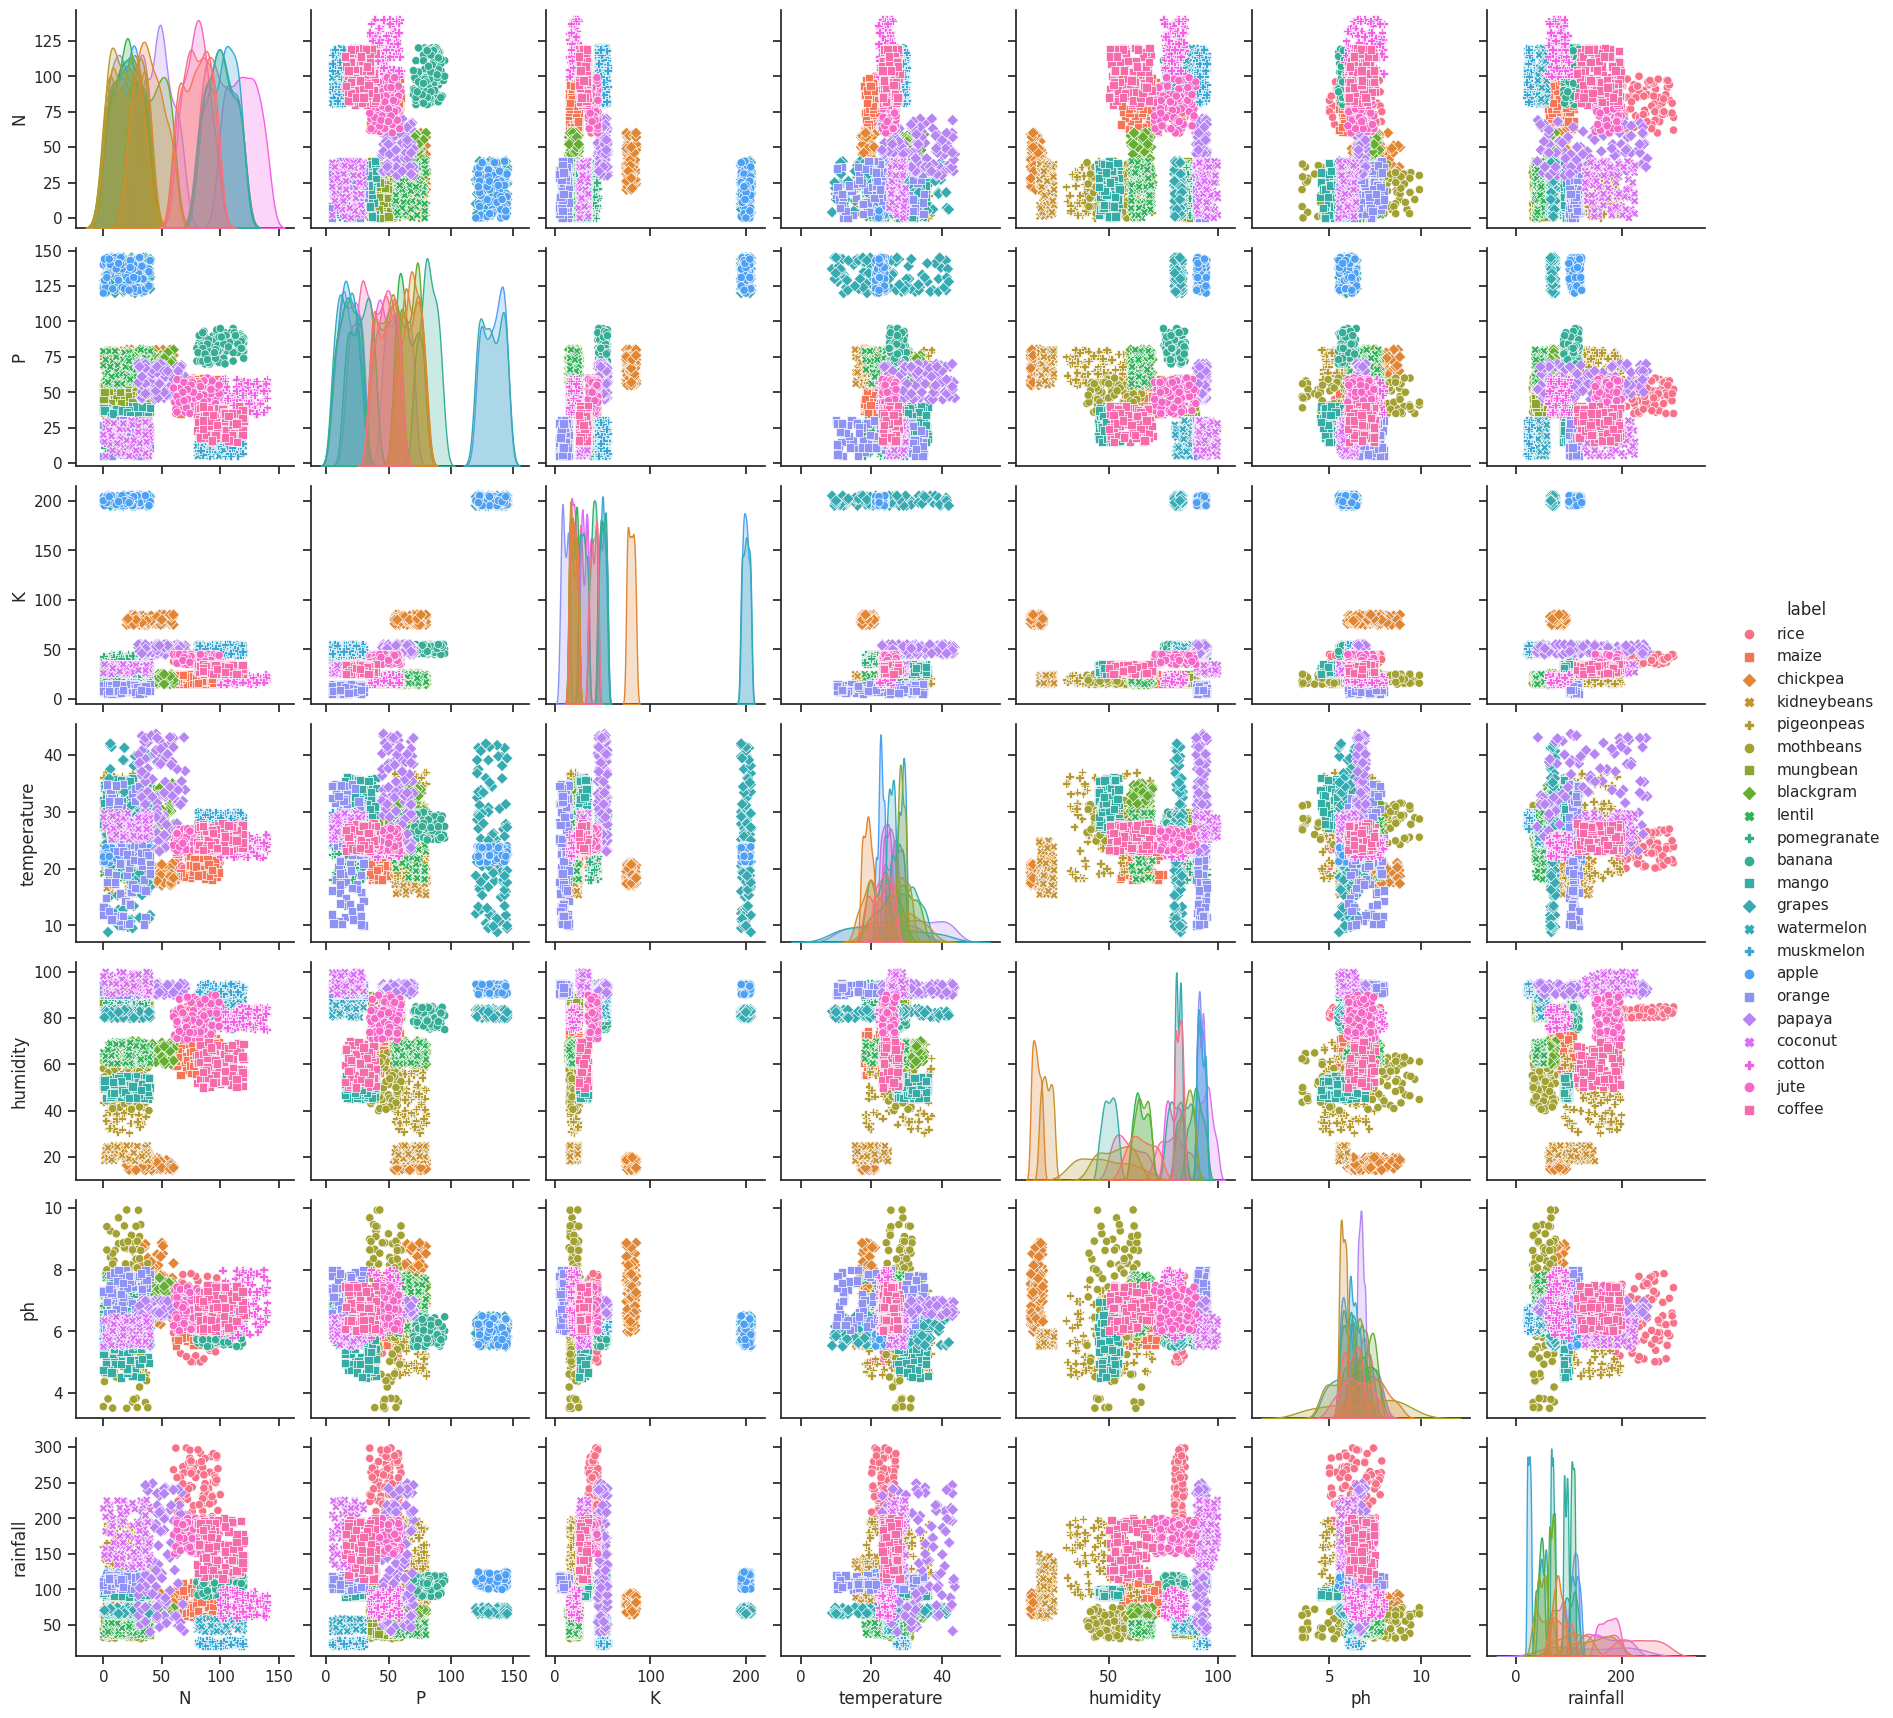

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.set(style="ticks")
sns.pairplot(new_crop, hue="label", markers=["o", "s", "D", "X", "P"], diag_kind="kde")
plt.show()

In [ ]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
new_crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# **Seperating features and target label**

In [ ]:
features = new_crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = new_crop['label']

In [ ]:
features

,N,P,K,temperature,humidity,ph,rainfall
0,74,52,36,20.879744,82.002744,6.502985,202.935536
1,72,38,40,21.770462,80.319644,7.038096,226.655537
2,68,51,45,23.004459,82.320763,7.840207,263.964248
3,65,43,41,26.491096,80.158363,6.980401,242.864034
4,81,41,35,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,93,16,25,26.774637,66.413269,6.780064,177.774507
2196,85,30,28,27.417112,56.636362,6.086922,127.924610
2197,92,30,26,24.131797,67.225123,6.362608,173.322839
2198,94,34,25,26.272418,52.127394,6.758793,127.175293


In [ ]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [ ]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =42)

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x*100)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.68181818181819
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      0.90      0.95        21
   blackgram       0.65      1.00      0.78        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.88      0.94        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       1.00      0.35      0.52        23
 kidneybeans       1.00      0.80      0.89        20
      lentil       0.73      1.00      0.85        11
       maize       0.76      0.90      0.83        21
       mango       1.00      0.84      0.91        19
   mothbeans       1.00      0.46      0.63        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00

In [ ]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [ ]:
score

array([0.92272727, 0.90681818, 0.91818182, 0.90681818, 0.93181818])

# **Guassian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x*100)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  99.54545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00  

In [ ]:
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [ ]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99545455, 0.99772727, 0.99318182, 0.99545455, 0.99090909])

# **Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x*100)
model.append('SVM')
print("SVM's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  98.63636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.88      0.96      0.92        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00

In [ ]:
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

In [ ]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.98181818, 0.97954545, 0.98636364, 0.98636364, 0.98181818])

# **Logistic** **Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x*100)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  96.81818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.90      0.92        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        17
      grapes       1.00      1.00      1.00        14
        jute       0.85      0.96      0.90        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.83      0.91      0.87        11
       maize       1.00      0.90      0.95        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.87      0.83      0.85        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00    

In [ ]:
# Dump the trained LogisticRegression classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.96136364, 0.96136364, 0.95681818, 0.96136364, 0.95681818])

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x*100)
model.append('RF')
print("RF's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  99.54545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00 

In [ ]:
# Dump the trained RandomForest classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [ ]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99545455, 0.99772727, 0.99090909, 0.98863636, 0.99318182])

# **Accuracy Comparison**

In [ ]:
acc

[90.68181818181819,
 99.54545454545455,
 98.63636363636363,
 96.81818181818181,
 99.54545454545455]

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

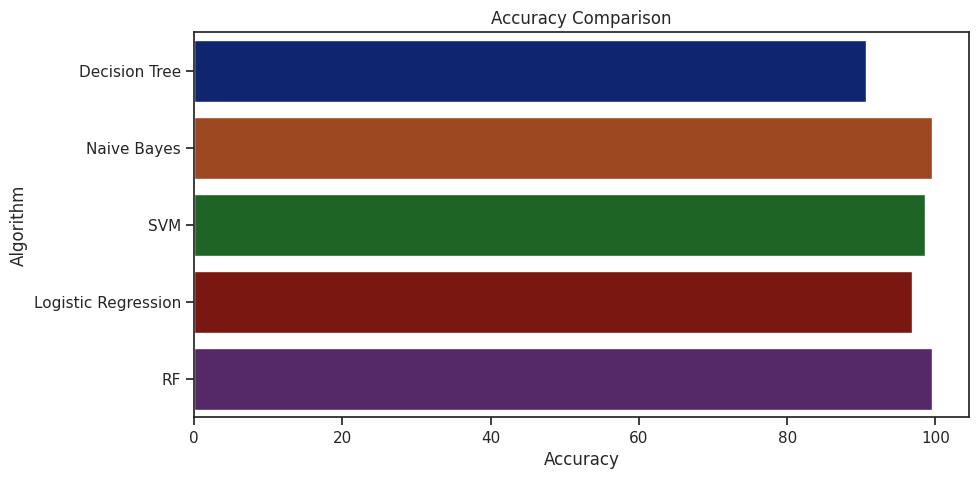

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 90.68181818181819
Naive Bayes --> 99.54545454545455
SVM --> 98.63636363636363
Logistic Regression --> 96.81818181818181
RF --> 99.54545454545455


In [ ]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']
